In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import spearmanr
import kagglehub
import os


## Retrieving Data From Kaggel

In [ ]:

# # Download latest version
# path = kagglehub.dataset_download("singhnavjot2062001/product-advertising-data")

path="/Users/emirysaglam/.cache/kagglehub/datasets/singhnavjot2062001/product-advertising-data/versions/82"
# print("Path to dataset files:", path)

In [118]:

print(os.listdir(path)[0])


product_advertising_data.csv


In [ ]:
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.420000,538.800000,123.940000,349.300000,242.770000,910.100000,7164.000000
1,702.970000,296.530000,558.130000,180.550000,781.060000,132.430000,5055.000000
2,313.140000,295.940000,642.960000,505.710000,438.910000,464.230000,6154.000000
3,898.520000,61.270000,548.730000,240.930000,278.960000,432.270000,5480.000000
4,766.520000,550.720000,651.910000,666.330000,396.330000,841.930000,9669.000000
...,...,...,...,...,...,...,...
295,770.050000,501.360000,694.600000,172.260000,572.260000,410.560000,6851.000000
296,512.380000,250.830000,373.780000,366.950000,987.140000,509.030000,6477.000000
297,998.100000,858.750000,781.060000,60.610000,174.630000,213.530000,6949.000000
298,322.350000,681.220000,640.290000,343.650000,534.220000,648.710000,7737.000000


In [120]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [122]:
plt.rcParams['font.family'] = 'DIN Alternate'  # fontu DIN olarak ayarladık
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10


## EDA

Creating a cost per product sold feature to analyze the efficiency of different marketing channels.


In [123]:
df['Total_Spend'] = df["TV"]+df["Billboards"]+df["Google_Ads"]+df["Social_Media"]+df["Influencer_Marketing"]+df["Affiliate_Marketing"]
df['Cost_Per_Prodcut_Sold'] = df['Total_Spend'] / df["Product_Sold"]  


In [124]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold,Total_Spend,Cost_Per_Prodcut_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333,2972.483367,0.427005
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951,672.237327,0.044240
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000,1150.110000,0.338374
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000,2547.990000,0.397231
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000,3032.070000,0.424097
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000,3364.857500,0.452820
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000,5225.420000,0.628256


In [186]:
channel_colors = {
    'TV': '#898989',
    'Billboards': '#F5EE9E',
    'Google_Ads': '#006ED6',
    'Social_Media': '#330C2F',
    'Influencer_Marketing': '#C41E3D',
    'Affiliate_Marketing': '#C6EBBE'
}

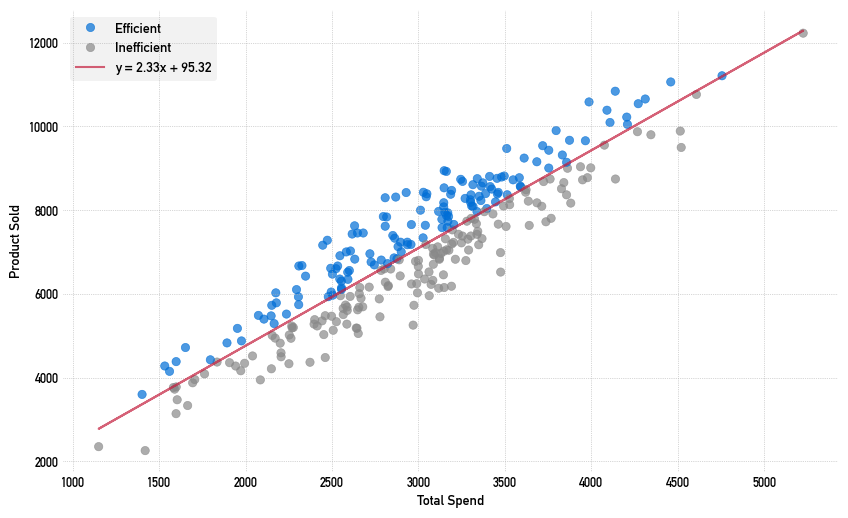

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fit linear regression
x = df["Total_Spend"]
y = df["Product_Sold"]
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept

# Create a new column 'Above_Below'
df['Above_Below'] = np.where(df['Product_Sold'] > y_pred, 'Efficient', 'Inefficient')

# Scatter plot using the new column for color
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Total_Spend', y='Product_Sold', hue='Above_Below', palette={'Efficient':'#006ED6', 'Inefficient':'#898989'}, edgecolor=None,alpha=0.7)

# Plot trend line
plt.plot(x, y_pred, color='#C41E3D', label=f'y = {slope:.2f}x + {intercept:.2f}',alpha=0.7)
plt.xlabel("Total Spend")
plt.ylabel("Product Sold")


plt.grid(True, linestyle=':', linewidth=0.5)

# Style adjustments
plt.tick_params(axis='both', labelsize=9,length=0)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

leg = ax.legend(facecolor='#898989', edgecolor='none')  # kenar çizgisi yok
leg.get_frame().set_alpha(0.1)

plt.show()


We divided marketing campaigns into above and below according to the trend line to analyze what differentiates efficient marketing campaigns from inefficient ones.


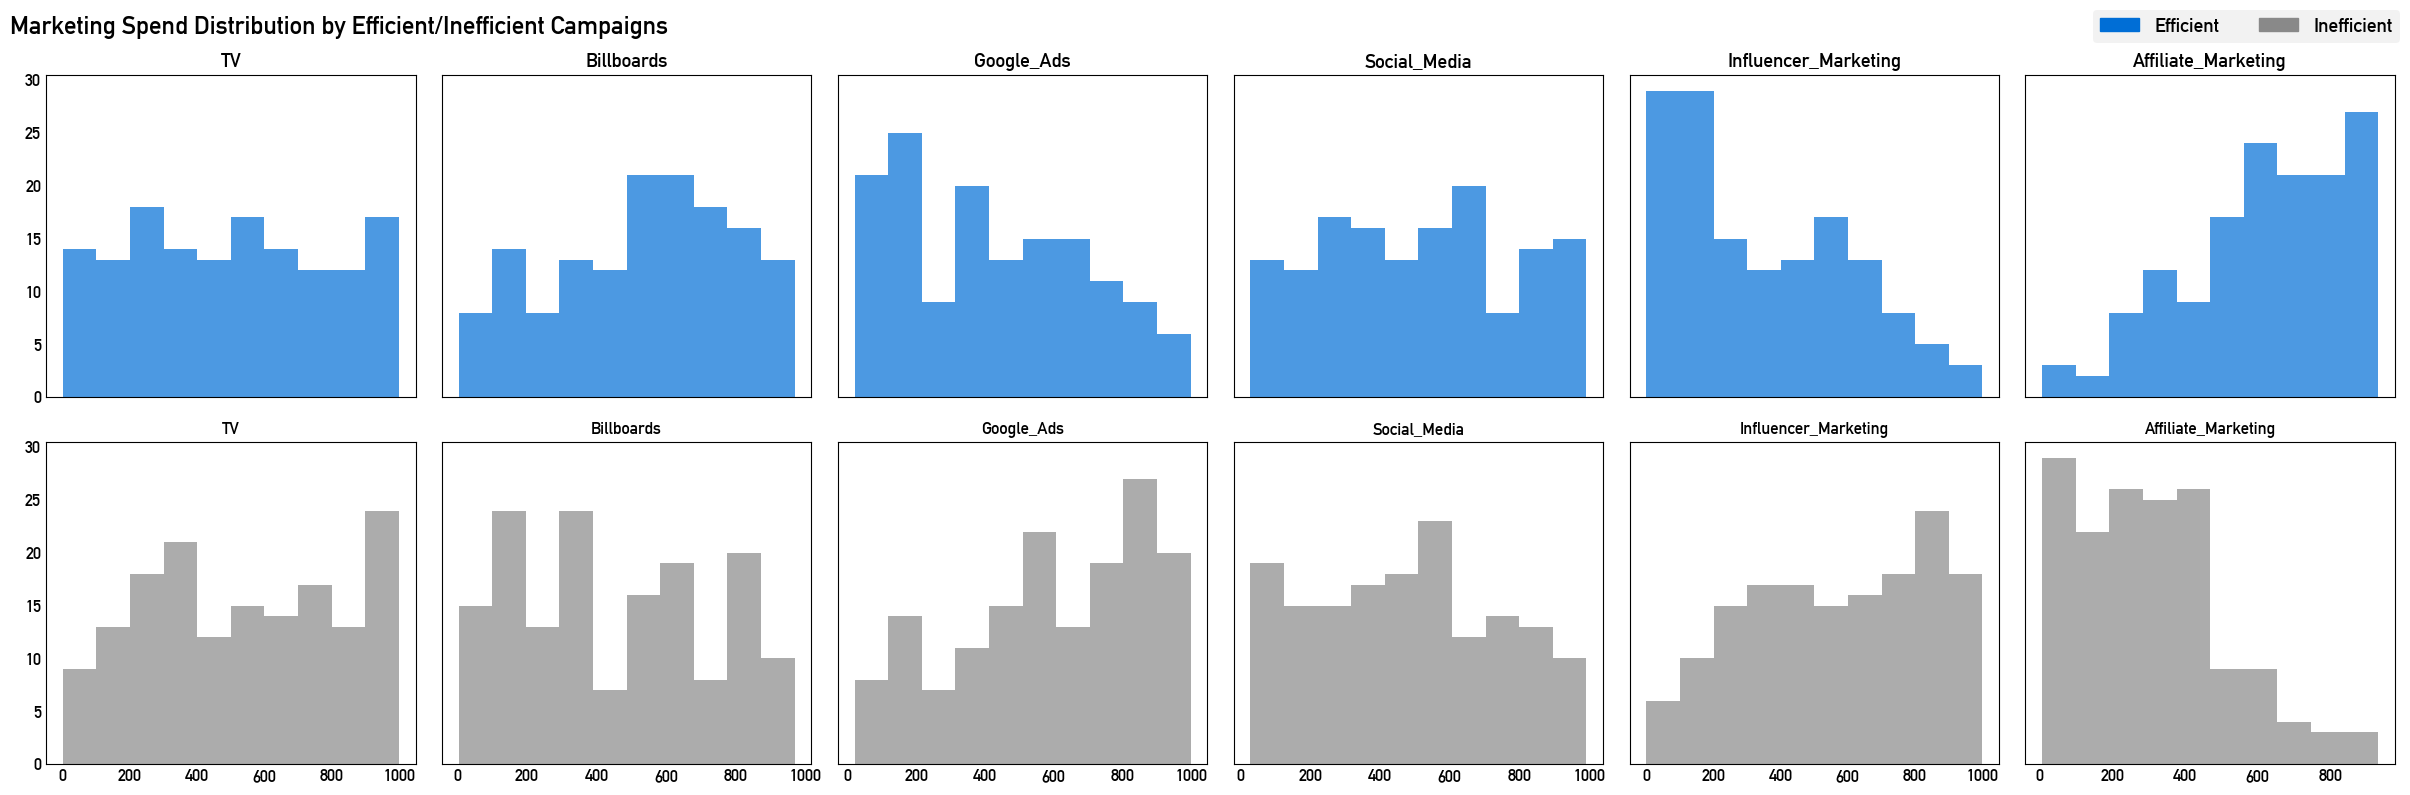

In [255]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

columns = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']
fig, axes = plt.subplots(2, 6, figsize=(24, 8), sharey=True)

# Genel başlık (sola hizalı)
fig.suptitle("Marketing Spend Distribution by Efficient/Inefficient Campaigns", fontsize=18, fontweight='bold', ha='left', x=0)

# Histogramlar
for i, col in enumerate(columns):
    axes[0, i].hist(df[df['Above_Below']=='Efficient'][col], bins=10, color='#006ED6', alpha=0.7)
    axes[0, i].set_title(f'{col}', fontsize=14)
    axes[1, i].hist(df[df['Above_Below']=='Inefficient'][col], bins=10, color='#898989', alpha=0.7)
    
    axes[0, i].set_xticks([])      
    # Alt sıradaki subplotlar x değerlerini gösterir
    axes[1, i].set_title(f'{col}', fontsize=12)

    # Grid ve ticks her subplot için
    for ax in [axes[0, i], axes[1, i]]:
        ax.tick_params(axis='both', labelsize=12, length=0)
   

# Tek legend için benzersiz handles
above_patch = mpatches.Patch(color='#006ED6', label='Efficient')
below_patch = mpatches.Patch(color='#898989', label='Inefficient')

# Legend yan yana ve yarı şeffaf
leg = fig.legend(handles=[above_patch, below_patch], loc='upper right', bbox_to_anchor=(1, 1),
                 ncol=2, fontsize=14, frameon=True,facecolor='#898989')
leg.get_frame().set_edgecolor('none')
leg.get_frame().set_alpha(0.1)

plt.tight_layout()
plt.show()


We can see that efficient campaigns spend more on billboards and affiliate marketing, and spend less on Google Ads and influencer marketing compared to inefficient campaigns.


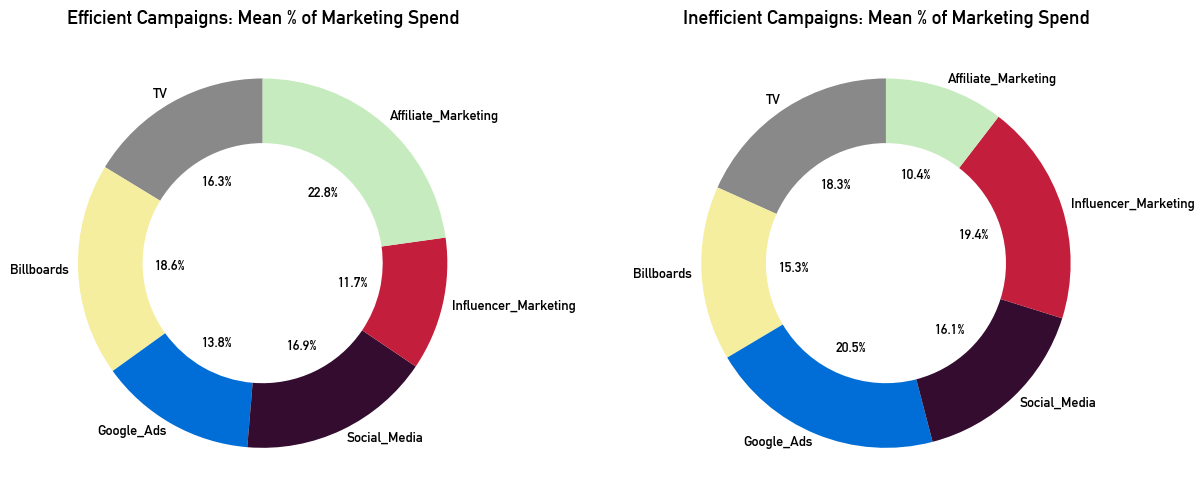

In [257]:
import matplotlib.pyplot as plt

# Columns of marketing channels
channels = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']

# Compute mean % of each channel relative to Total_Spend for Above and Below
above_means = (df[df['Above_Below']=='Efficient'][channels].div(df[df['Above_Below']=='Efficient']['Total_Spend'], axis=0)).mean()
below_means = (df[df['Above_Below']=='Inefficient'][channels].div(df[df['Above_Below']=='Inefficient']['Total_Spend'], axis=0)).mean()

# Plot donut charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# Above
axes[0].pie(above_means, labels=channels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.35),colors=[channel_colors[ch] for ch in channels], pctdistance=0.5,labeldistance=1.05 )
axes[0].set_title('Efficient Campaigns: Mean % of Marketing Spend')

# Below
axes[1].pie(below_means, labels=channels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.35),colors=[channel_colors[ch] for ch in channels],pctdistance=0.5,labeldistance=1.05)
axes[1].set_title('Inefficient Campaigns: Mean % of Marketing Spend')

fig.subplots_adjust(wspace=0.35)

plt.show()




Differences in cost percentages of genres within total spending validate the previous insight: efficient campaigns allocate more to affiliate marketing and billboards than inefficient campaigns.


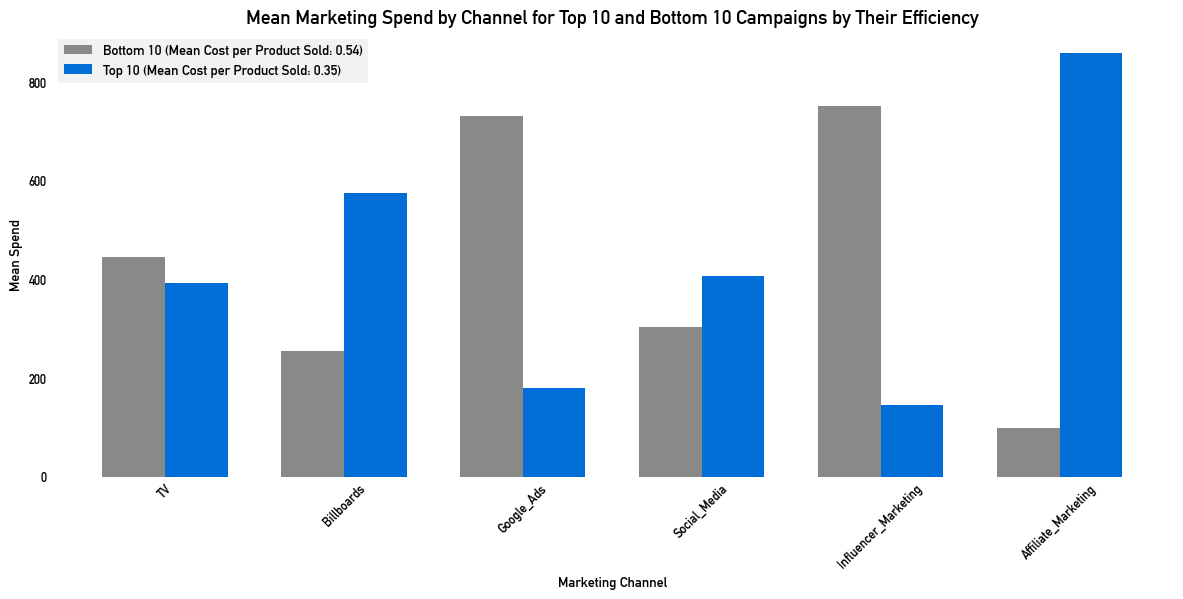

In [259]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 and bottom 10 mean values
top10_df = df.sort_values(by="Cost_Per_Prodcut_Sold", ascending=True).head(10)
bottom10_df = df.sort_values(by="Cost_Per_Prodcut_Sold", ascending=False).head(10)

top10 = top10_df[['TV', 'Billboards', 'Google_Ads', 'Social_Media',
                  'Influencer_Marketing', 'Affiliate_Marketing']].mean()
bottom10 = bottom10_df[['TV', 'Billboards', 'Google_Ads', 'Social_Media',
                        'Influencer_Marketing', 'Affiliate_Marketing']].mean()

mean_top_cost = top10_df['Cost_Per_Prodcut_Sold'].mean()
mean_bottom_cost = bottom10_df['Cost_Per_Prodcut_Sold'].mean()

channels = top10.index
x = np.arange(len(channels))
width = 0.35



plt.figure(figsize=(12,6))
plt.bar(x - width/2, bottom10.values, width, label=f'Bottom 10 (Mean Cost per Product Sold: {mean_bottom_cost:.2f})', color='#898989')
plt.bar(x + width/2, top10.values, width, label=f'Top 10 (Mean Cost per Product Sold: {mean_top_cost:.2f})', color='#006ED6')

plt.xlabel('Marketing Channel')
plt.ylabel('Mean Spend')
plt.xticks(x, channels, rotation=45)
plt.tight_layout()

plt.title('Mean Marketing Spend by Channel for Top 10 and Bottom 10 Campaigns by Their Efficiency')


# Style adjustments
plt.tick_params(axis='both', labelsize=9,length=0)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

leg = ax.legend(facecolor='#898989', edgecolor='none')  # kenar çizgisi yok
leg.get_frame().set_alpha(0.1)


plt.show()


Lastly, examining the top 10 and bottom 10 campaigns by efficiency once again validates our insight, revealing a significant difference in the allocation of money to billboards, Google Ads, influencer marketing, and affiliate marketing.


In [201]:
df.drop(columns=['Above_Below'], inplace=True)

In [207]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold',
       'Total_Spend', 'Cost_Per_Prodcut_Sold'],
      dtype='object')

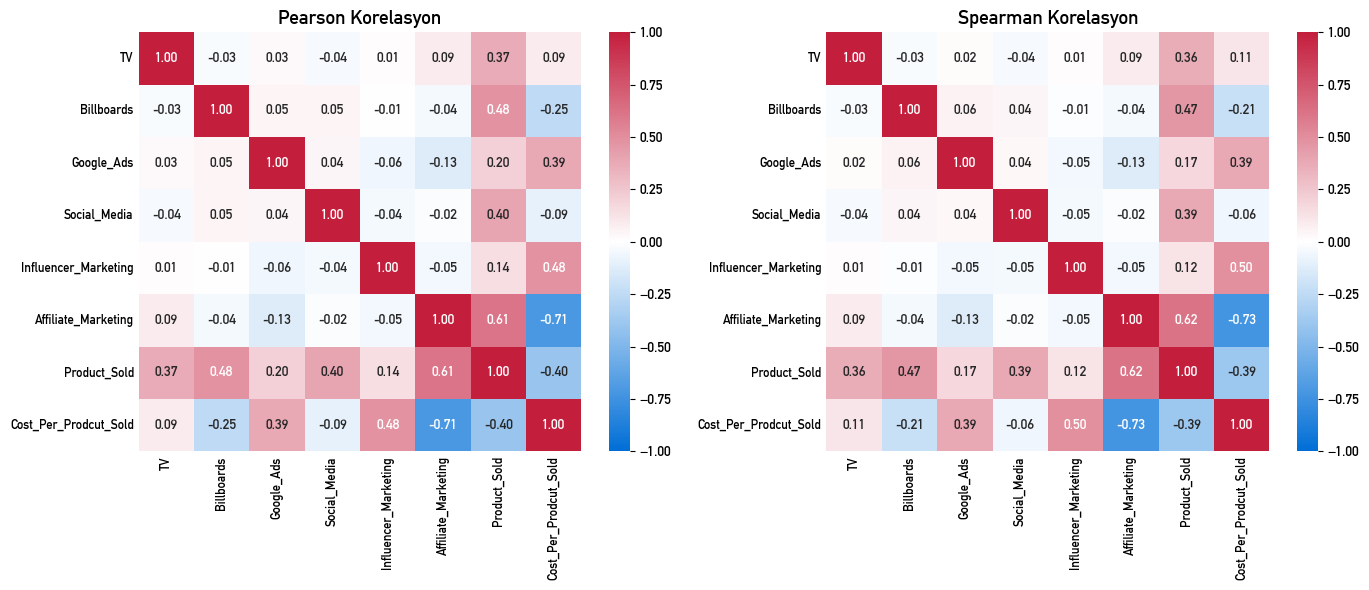

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Özel colormap: -1 için #C41E3D (kırmızı), 0 beyaz, +1 için #006ED6 (mavi)
custom_cmap = LinearSegmentedColormap.from_list('custom_corr', ['#006ED6', 'white','#C41E3D'])

cols= ['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold', 'Cost_Per_Prodcut_Sold']

# Yan yana grafik
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson correlation
corr_matrix1 = df[cols].corr(method='pearson')
sns.heatmap(corr_matrix1, annot=True, cmap=custom_cmap, fmt=".2f", 
            vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Pearson Korelasyon")
axes[0].tick_params(axis='both', labelsize=9,length=0)


# Spearman correlation
corr_matrix2 = df[cols].corr(method='spearman')
sns.heatmap(corr_matrix2, annot=True, cmap=custom_cmap, fmt=".2f", 
            vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Spearman Korelasyon")
axes[1].tick_params(axis='both', labelsize=9,length=0)


plt.tight_layout()
plt.show()


Correlation matrices indicate that affiliate marketing has the strongest influence on products sold with a 0.61 correlation coefficient, followed by billboards at 0.48, social media at 0.40, TV at 0.37, Google Ads at 0.20, and influencer marketing at 0.14. These coefficients show the relative importance of each channel in relation to product sales. Additionally, affiliate marketing spendings significantly reduce cost per product sold, billboards also have a reducing effect, while Google Ads and influencer marketing increase the cost per product sold.


## Linear Regression Assumpitons

### Assumption 1: Variable Types
We observe that each feature has float values, which satisfies the continuity assumption.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TV                     300 non-null    float64
 1   Billboards             300 non-null    float64
 2   Google_Ads             300 non-null    float64
 3   Social_Media           300 non-null    float64
 4   Influencer_Marketing   300 non-null    float64
 5   Affiliate_Marketing    300 non-null    float64
 6   Product_Sold           300 non-null    float64
 7   Total_Spend            300 non-null    float64
 8   Cost_Per_Prodcut_Sold  300 non-null    float64
dtypes: float64(9)
memory usage: 21.2 KB


### Assumption 2: Linearity
We can see that connection between the dependent
variable (sales) and each independent variable (ads) is linear.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


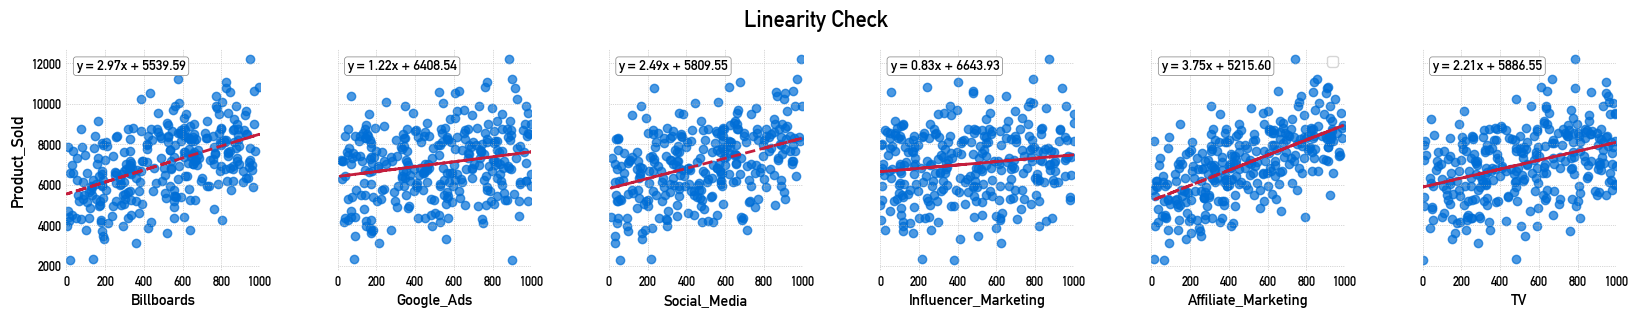

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

independent = ['TV',
 'Billboards',
 'Google_Ads',
 'Social_Media',
 'Influencer_Marketing',
 'Affiliate_Marketing']

dependent = ['Product_Sold']

fig, axes = plt.subplots(1, len(independent), figsize=(20, 3), sharey=True)
fig.suptitle("Linearity Check", fontsize=16)

axes[0].set_ylabel(dependent[0], fontsize=12)

for i, col in enumerate(independent):
    if col == dependent[0]:
        continue
    ax = axes[i-1]
    x = df[col]
    y = df[dependent[0]]
    
    ax.scatter(x, y, alpha=0.7,color="#006ED6")
    
    # Fit and plot trendline
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs)
    ax.plot(x, trend(x), color='#C41E3D', linestyle='--', linewidth=2)
    
    # Add linear equation as text
    equation = f"y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}"
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", lw=0.5))
    
    ax.set_xlabel(col, fontsize=11)
    ax.set_xlim(0, 1000)  # X eksenini sabitle
    ax.set_aspect('auto')

    ax.grid(True, linestyle=':', linewidth=0.5)

    # Style adjustments
    ax.tick_params(axis='both', labelsize=9,length=0)
    for spine in ax.spines.values():
        spine.set_visible(False)

ax.legend()


plt.subplots_adjust(top=0.85, wspace=0.4)
plt.show()

### Assumption 3: Normal Distribution of Residuals & Assumption 4: Homoscedasticity

From the plots below, we observe that the residuals are normally distributed and exhibit homoscedasticity.


                            OLS Regression Results                            
Dep. Variable:           Product_Sold   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.347e+06
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:53:39   Log-Likelihood:                -1123.6
No. Observations:                 300   AIC:                             2261.
Df Residuals:                     293   BIC:                             2287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0887 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


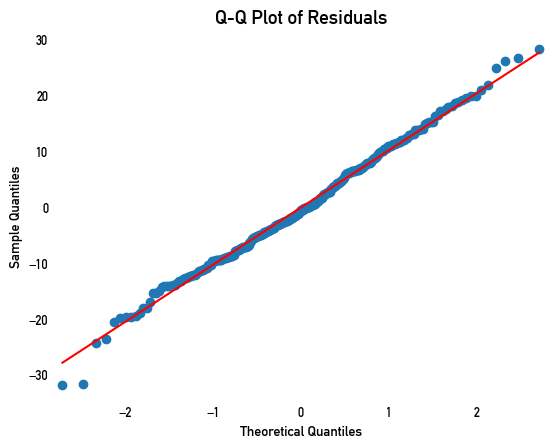

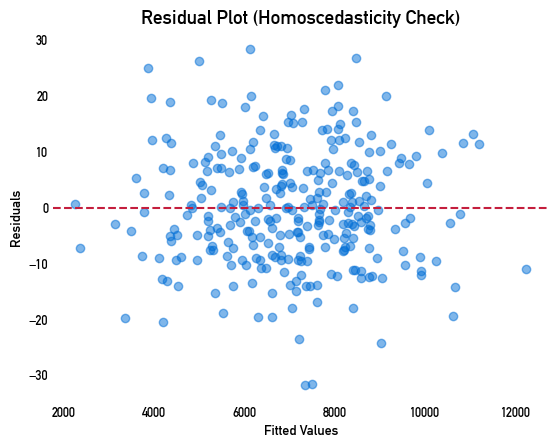

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Step 3: Build formula string
formula = 'Product_Sold ~ TV + Billboards + Google_Ads + Social_Media + Influencer_Marketing + Affiliate_Marketing'

# Step 4: Fit OLS model
model_sm = ols(formula, data=df).fit()
print(model_sm.summary())

# Step 5: Q-Q plot for residuals
sm.qqplot(model_sm.resid, line='s', marker='o', color='#006ED6') 
plt.title('Q-Q Plot of Residuals')

# Style adjustments
plt.tick_params(axis='both', labelsize=9,length=0)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()


plt.scatter(model_sm.fittedvalues, model_sm.resid, alpha=0.5,color='#006ED6')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Homoscedasticity Check)')
plt.axhline(y=0, color='#C41E3D', linestyle='--')

# Style adjustments
plt.tick_params(axis='both', labelsize=9,length=0)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)


plt.show()


In [ ]:
from statsmodels.stats.diagnostic import linear_reset

# reset test with 2nd and 3rd powers of fitted values
reset_test = linear_reset(model_sm, power=2, use_f=True)
print('F-statistic:', reset_test.fvalue)
print('p-value:', reset_test.pvalue)


F-statistic: 0.07831862140755844
p-value: 0.7797871665666968


Since the p-value is greater than or equal to 0.05, there is no evidence of misspecification, leading to the conclusion that the linearity of the model is reasonable, in addition to visual inspection.


In [ ]:
anova_table = sm.stats.anova_lm(model_sm, typ=2)
anova_table = anova_table[anova_table["PR(>F)"] < 0.05].sort_values(by="sum_sq", ascending=False)
pd.set_option('display.float_format', '{:.6f}'.format)
anova_table

,sum_sq,df,F,PR(>F)
Affiliate_Marketing,358360509.304126,1.000000,3338226.463162,0.000000
Billboards,203103925.674227,1.000000,1891968.790798,0.000000
Social_Media,139199418.982697,1.000000,1296680.778268,0.000000
TV,98256951.340697,1.000000,915290.459298,0.000000
Google_Ads,53331113.812784,1.000000,496793.956972,0.000000
Influencer_Marketing,35476867.266027,1.000000,330476.751938,0.000000


The ANOVA table indicates that all features are statistically significant and also validates previous insights about the effects and importance of marketing genres on product sales.


### Assumption 5: Multicolinearity
Variance inflation factor result shows that there is no multicolinearity since all values below 5.

In [ ]:
df.columns


Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [ ]:
selected_features = [ 'TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd



X = df[selected_features]
y = df['Product_Sold']

# Add intercept after scaling
X_vif = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif['Variable'] = ['const'] + selected_features
vif['VIF'] = [variance_inflation_factor(X_vif, i) for i in range(X_vif.shape[1])]
vif

,Variable,VIF
0,const,20.714442
1,TV,1.011536
2,Billboards,1.006814
3,Google_Ads,1.027308
4,Social_Media,1.007057
5,Influencer_Marketing,1.008573
6,Affiliate_Marketing,1.030827


## Building the Model

In [260]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [261]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


print("Intercept:", regr.intercept_)
print("R-squared:", regr.score(X_test, y_test))
print("MAE:", mean_absolute_error(y_test,regr.predict(X_test)))
print("MSE:", mean_squared_error(y_test,regr.predict(X_test)))
print("RMSE:", np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))



Intercept: 0.7161970526331061
R-squared: 0.9999682052807746
MAE: 7.705454380624427
MSE: 88.69568021383851
RMSE: 9.417838404529912


Since the mean of the target variable (products sold) is 7,031, the intercept (1.3) is very low, indicating it has minimal bias at zero. Additionally, the R-squared value of 0.99 demonstrates that the model explains 99% of the variance in product sales. Both factors suggest our model is highly accurate in estimating product sales. Furthermore, the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are very low relative to the mean, confirming minimal prediction errors. Overall, the model performs exceptionally well in estimating product sales.

In [267]:
# Katsayılar dataframe’i
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': regr.coef_})

# Intercept’i ekle
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [regr.intercept_]})

# Birleştir
coef_df = pd.concat([intercept_df, coef_df], ignore_index=True)

print(coef_df)


                Feature  Coefficient
0             Intercept     0.716197
1                    TV     2.002736
2            Billboards     2.997861
3            Google_Ads     1.498607
4          Social_Media     2.500496
5  Influencer_Marketing     1.199136
6   Affiliate_Marketing     3.996966


From the model, we get the equation below:

$$
Product Sold = 0.7162 + 2.0027 \cdot TV + 2.9979 \cdot Billboards + 1.4986 \cdot Google Ads + 2.5005 \cdot Social Media + 1.1991 \cdot Influencer Marketing + 3.9970 \cdot Affiliate Marketing
$$

This equation summarizes how different marketing channels contribute to product sales. The coefficients indicate the relative influence of each channel: affiliate marketing and billboards have the strongest positive effect on sales, while other channels like Google Ads and influencer marketing contribute less. These results align with the insights from the exploratory analysis, confirming that allocating more budget to high-impact channels like affiliate marketing and billboards is likely to increase sales efficiently.

In [263]:
import pandas as pd
import numpy as np

df['Prediction'] = regr.predict(df[selected_features])
df[['Prediction','Product_Sold']].head(10) 

,Prediction,Product_Sold
0,7167.487165,7164.000000
1,5051.332857,5055.000000
2,6124.934190,6154.000000
3,5470.948101,5480.000000
4,9670.366689,9669.000000
5,7621.168031,7627.000000
6,5170.868194,5177.000000
7,3735.738509,3726.000000
8,9791.168025,9801.000000
9,8650.620322,8652.000000


In [265]:
df.to_csv("product_advertising_data.csv", index=False)